# Additional Supervised Classifiers
- Naive Bayes: Two BIG assumptions - features are independent, all features have the same weight.
- k-NN classifier: It looks at the k-nearest points and their labels, and assigns new labels to new datapoints by checking the majority label of its k-nearest neighbors.
- SVM (Support Vector Machine): Learns hyperplane(s) that seperates datapoints into classes https://youtu.be/efR1C6CvhmE?si=paP40QIuiS-2dXeH&t=439
- A linear kernel is simpler and faster for linear problems, while an RBF kernel provides greater flexibility for complex data distributions.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "SVM (Linear Kernel)": SVC(kernel='linear', C=1.0),
    "SVM (RBF Kernel)": SVC(kernel='rbf', C=1.0, gamma='scale'),
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))



SVM (Linear Kernel) Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


SVM (RBF Kernel) Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


k-NN Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1

# Additional supervised regressors
- Linear Regression: Models a straight-line relationship between features and the target.
- Ridge Regression: Like linear regression but reduces large coefficients to avoid overfitting.
- Lasso Regression: Like linear regression but removes unimportant features by shrinking some coefficients to zero.
- Elastic Net Regression: A mix of Ridge and Lasso, balancing shrinking and removing features.
- Support Vector Regression (SVR): Predicts target values with support vectors.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(kernel='rbf', C=1.0, gamma='scale')
}

# Train and evaluate each regressor
for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")



Linear Regression Results:
Mean Squared Error: 0.5306
R² Score: 0.5958

Ridge Regression Results:
Mean Squared Error: 0.5305
R² Score: 0.5958

Lasso Regression Results:
Mean Squared Error: 0.5971
R² Score: 0.5451

Elastic Net Regression Results:
Mean Squared Error: 0.5571
R² Score: 0.5755

SVR Results:
Mean Squared Error: 1.3490
R² Score: -0.0278


Wait, why is SVR so bad?  
Actually, SVM/SVR are sensitive to hyperparameters.
- Smaller C: Increases regularization, leading to a simpler model that may underfit.
- Bigger C: Reduces regularization, focusing more on fitting the training data.
- Smaller gamma: Each point influences the decision boundary over a larger area, resulting in a smoother and simpler model that may underfit.
- Larger gamma: Each point influences a smaller area, making the model more flexible but potentially overfitting.


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Use a smaller subset of the training data
X_train_small, y_train_small = resample(X_train_scaled, y_train_scaled, n_samples=1000, random_state=42)

# Hyperparameter tuning for SVR
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.1]
}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train_small, y_train_small)

# Best model
best_svr = grid_search.best_estimator_

# Predict and evaluate
y_pred_scaled = best_svr.predict(X_test_scaled)

# Reshape y_pred_scaled to a 2D array with a single column
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Optimized SVR Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Optimized SVR Results:
Best Parameters: {'C': 10, 'gamma': 'scale'}
Mean Squared Error: 0.3848
R² Score: 0.7068


# Underfitting and Overfitting

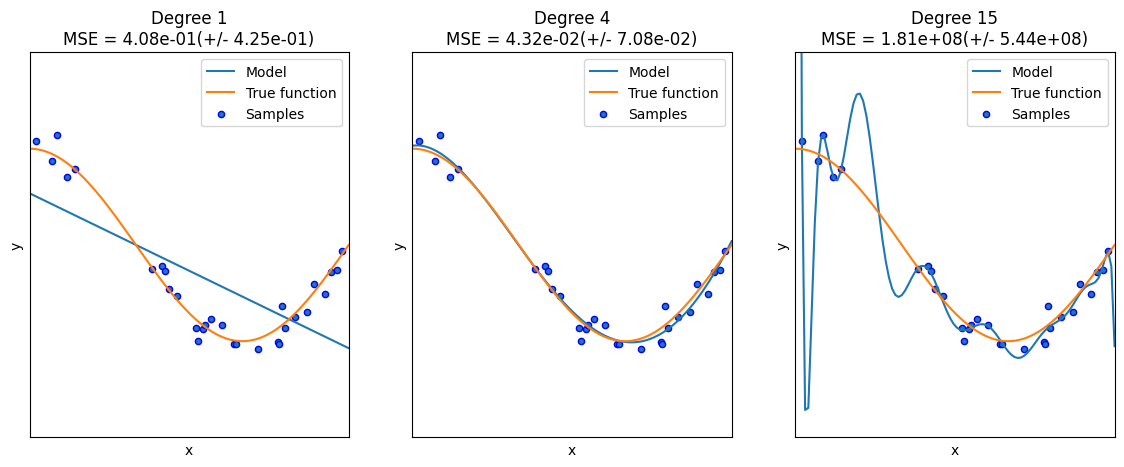

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()


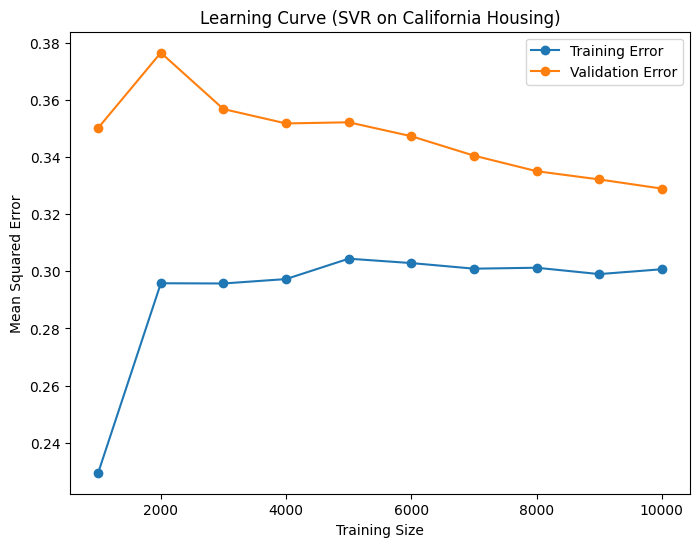

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Compute learning curve values
train_sizes, train_scores, test_scores = learning_curve(
    svr_pipeline, X, y, train_sizes=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker="o")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve (SVR on California Housing)")
plt.legend()
plt.show()


https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves

# Feature extraction and selection
https://www.geeksforgeeks.org/difference-between-feature-selection-and-feature-extraction/

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vanilla Linear Regression (no feature selection or extraction)
X_train_vanilla, X_test_vanilla, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
lr_vanilla = LinearRegression()
lr_vanilla.fit(X_train_vanilla, y_train)
y_pred_vanilla = lr_vanilla.predict(X_test_vanilla)
mse_vanilla = mean_squared_error(y_test, y_pred_vanilla)
r2_vanilla = r2_score(y_test, y_pred_vanilla)

# Feature Extraction: PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

# Feature Selection: SelectKBest
X_kbest = SelectKBest(score_func=f_regression, k=4).fit_transform(X_scaled, y)
X_train_kbest, X_test_kbest, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)
lr_kbest = LinearRegression()
lr_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = lr_kbest.predict(X_test_kbest)
mse_kbest = mean_squared_error(y_test, y_pred_kbest)
r2_kbest = r2_score(y_test, y_pred_kbest)

# Print the results
print("Linear Regression Performance:")
print(f"Vanilla Dataset:\n  MSE: {mse_vanilla:.4f}, R²: {r2_vanilla:.4f}")
print(f"Feature Extraction (PCA):\n  MSE: {mse_pca:.4f}, R²: {r2_pca:.4f}")
print(f"Feature Selection (SelectKBest):\n  MSE: {mse_kbest:.4f}, R²: {r2_kbest:.4f}")


Linear Regression Performance:
Vanilla Dataset:
  MSE: 0.5306, R²: 0.5958
Feature Extraction (PCA):
  MSE: 0.7161, R²: 0.4544
Feature Selection (SelectKBest):
  MSE: 0.6302, R²: 0.5199
